In [27]:
from fractions import Fraction
from math import gcd
import random

# Function to check if a number is prime
def is_prime(n):
    if n <= 1:
        return False
    if n <= 3:
        return True
    if n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True


prime_numbers = []
while len(prime_numbers) < 600:
    number = random.randint(3, 7000)
    if is_prime(number):
        prime_numbers.append(number)
sorted_prime_numbers = sorted(prime_numbers)


# Function to compute the harmonic sum modulo a prime
def modulo_harmonic_sum(arr, prime):
    numerator, denominator = sum(Fraction(1, i) for i in arr).as_integer_ratio()
    return ((numerator % prime) * pow(denominator, -1, prime)) % prime


# Funtion to find a primitive root of a prime
def primitive_root(prime):
    for i in range(1, prime):
        coprime_set = set()
        for power in range(1, prime):
            cur = pow(i, power, prime)
            if cur in coprime_set:
                break
            else:
                coprime_set.add(cur)
        else:
            return i
        

# Generate a CM type
def generate_cm_type(prime):
    arr = []
    for i in range(1, (prime - 1)//2 +1):
        arr.append(random.choice([i, (-i) % prime]))
    return arr


# Function to compute the size of the orbit of a cm type
def number_orbit(cm_type):
    prime = len(cm_type) * 2 + 1
    primitive = primitive_root(prime)
    initial, cur = set(cm_type), set(cm_type)
    i = 1
    while True:
        cur = {(num * primitive) % prime for num in cur}
        if cur == initial:
            return i
        i += 1
        

# Data collection
data = []
for prime in sorted_prime_numbers:
    arr = generate_cm_type(prime)
    modulo = modulo_harmonic_sum(arr, prime)
    root = primitive_root(prime)
    ratio = modulo/prime
    orbit = number_orbit(arr)/(prime - 1 )
    data.append((prime, arr, modulo, root, orbit, ratio))
    
#print(data)

In [28]:
import pandas as pd

# Create a DataFrame

columns = ["Prime", 'CM_type', 'Modulo', 'Primitive_root', 'Orbit', "Ratio"]

df = pd.DataFrame(data, columns=columns)

print(df)

     Prime                                            CM_type  Modulo  \
0       11                                    [1, 2, 3, 7, 6]      10   
1       11                                    [1, 2, 3, 7, 5]       6   
2       17                       [1, 15, 14, 4, 12, 11, 7, 9]      13   
3       19                 [18, 17, 3, 15, 14, 13, 7, 11, 10]      16   
4       31  [1, 2, 3, 4, 5, 25, 7, 23, 22, 10, 20, 19, 18,...      11   
..     ...                                                ...     ...   
595   6959  [6958, 6957, 3, 6955, 6954, 6, 6952, 8, 6950, ...    6657   
596   6961  [6960, 6959, 6958, 4, 6956, 6955, 7, 6953, 9, ...    3219   
597   6967  [6966, 6965, 3, 4, 6962, 6961, 6960, 8, 9, 10,...    4884   
598   6967  [6966, 2, 3, 4, 6962, 6961, 6960, 6959, 9, 10,...      93   
599   6967  [6966, 2, 6964, 6963, 5, 6961, 7, 8, 6958, 695...    5634   

     Primitive_root  Orbit     Ratio  
0                 2    1.0  0.909091  
1                 2    1.0  0.545455  
2     

In [29]:
df.describe()

,Prime,Modulo,Primitive_root,Orbit,Ratio
count,600.000000,600.000000,600.000000,600.0,600.000000
mean,3204.156667,1604.651667,4.370000,1.0,0.500677
std,1989.066361,1499.020842,3.483292,0.0,0.291534
min,11.000000,0.000000,2.000000,1.0,0.000000
25%,1489.000000,388.500000,2.000000,1.0,0.243459
50%,3041.000000,1167.000000,3.000000,1.0,0.513726
75%,4943.000000,2412.500000,5.000000,1.0,0.753415
max,6967.000000,6657.000000,22.000000,1.0,0.999555


Mean Squared Error: 0.029407068661899734


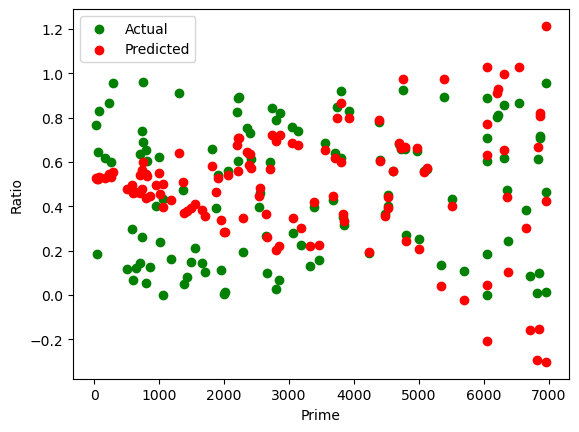

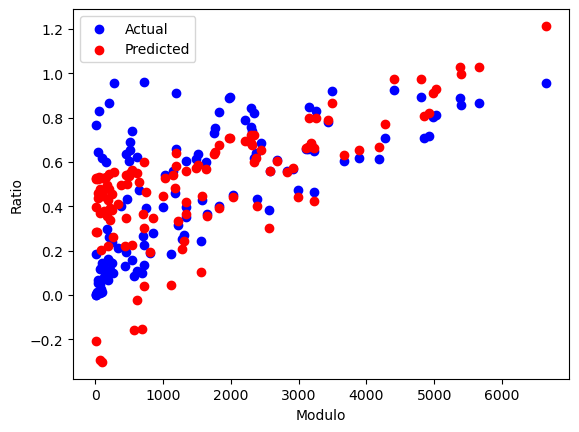

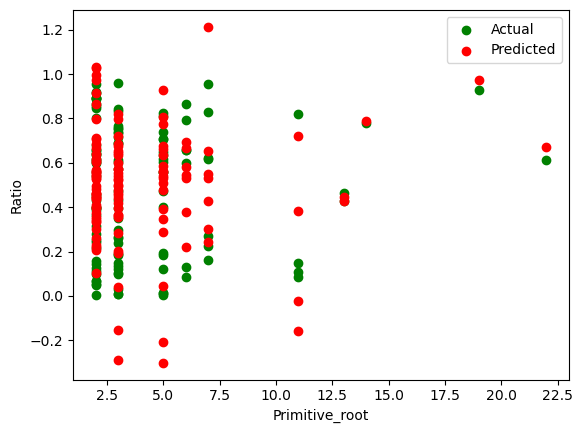

In [31]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['Prime', 'Modulo', 'Primitive_root', 'Orbit']]  
y = df['Ratio'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test['Prime'], y_test, color='green', label='Actual')
plt.scatter(X_test['Prime'], y_pred, color='red', label='Predicted')
plt.xlabel('Prime')
plt.ylabel('Ratio')
plt.legend()
plt.show()

plt.scatter(X_test['Modulo'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Modulo'], y_pred, color='red', label='Predicted')
plt.xlabel('Modulo')
plt.ylabel('Ratio')
plt.legend()
plt.show()

plt.scatter(X_test['Primitive_root'], y_test, color='green', label='Actual')
plt.scatter(X_test['Primitive_root'], y_pred, color='red', label='Predicted')
plt.xlabel('Primitive_root')
plt.ylabel('Ratio')
plt.legend()
plt.show()


Mean Squared Error: 0.013041425876308528


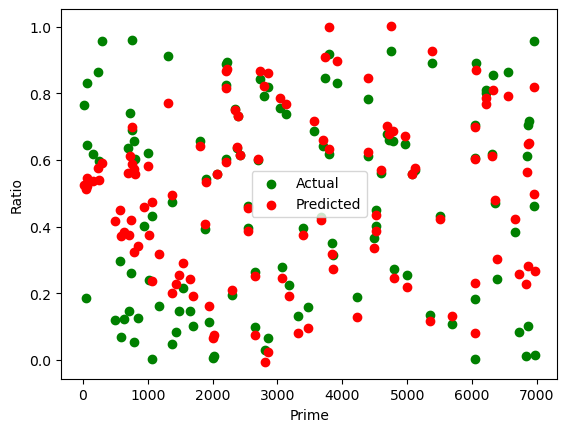

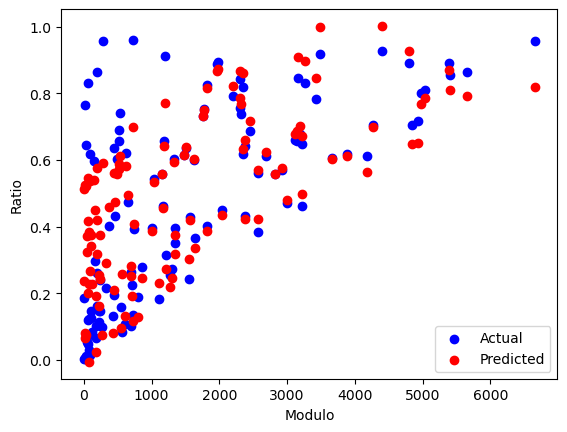

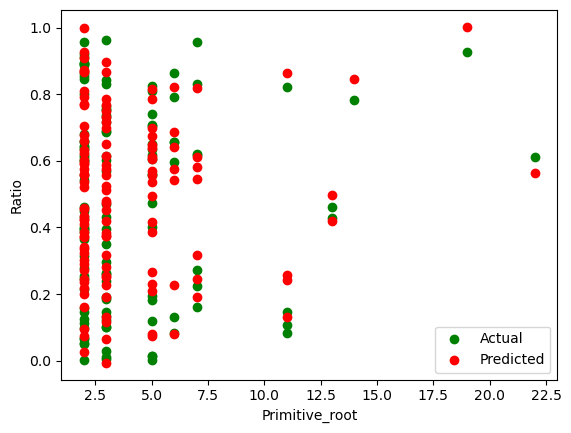

In [32]:
X = df[['Prime', 'Modulo', 'Primitive_root', 'Orbit']] 
y = df['Ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the results
plt.scatter(X_test['Prime'], y_test, color='green', label='Actual')
plt.scatter(X_test['Prime'], y_pred, color='red', label='Predicted')
plt.xlabel('Prime')
plt.ylabel('Ratio')
plt.legend()
plt.show()

plt.scatter(X_test['Modulo'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Modulo'], y_pred, color='red', label='Predicted')
plt.xlabel('Modulo')
plt.ylabel('Ratio')
plt.legend()
plt.show()

plt.scatter(X_test['Primitive_root'], y_test, color='green', label='Actual')
plt.scatter(X_test['Primitive_root'], y_pred, color='red', label='Predicted')
plt.xlabel('Primitive_root')
plt.ylabel('Ratio')
plt.legend()
plt.show()

Mean Squared Error: 11.174195389243636


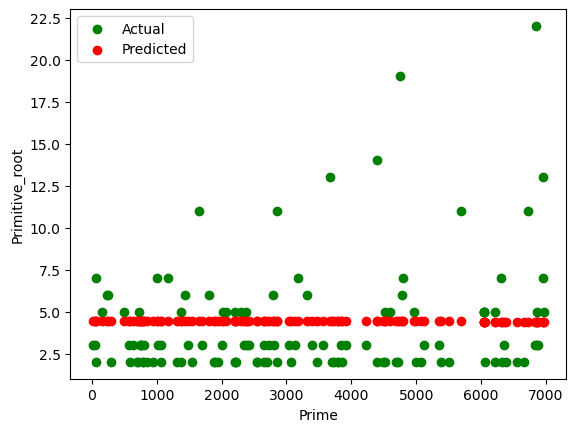

In [33]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df[['Prime']]  
y = df['Primitive_root'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Prime')
plt.ylabel('Primitive_root')
plt.legend()
plt.show()


Mean Squared Error: 11.293859985768869


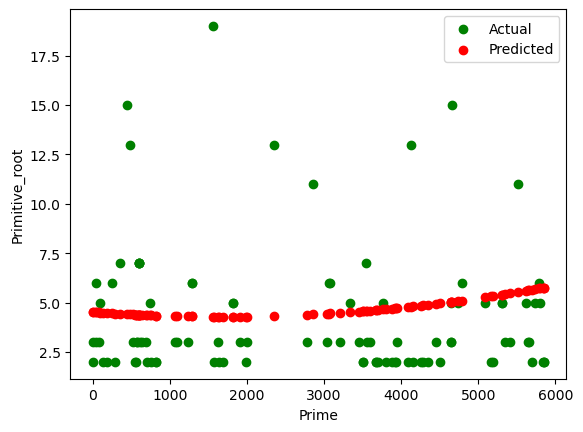

In [26]:
X = df[['Prime']] 
y = df['Primitive_root']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the results
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Prime')
plt.ylabel('Primitive_root')
plt.legend()
plt.show()
